<a href="https://colab.research.google.com/github/KoMurase/Learning_my_interest/blob/master/%E7%94%BB%E5%83%8F%E7%94%9F%E6%88%90%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import urllib.request
import zipfile
import tarfile

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [0]:
# フォルダ「data」が存在しない場合は作成する
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [31]:

import sklearn
print(sklearn.__version__)

0.21.3


In [0]:
# MNISTの手書き数字画像をダウンロードし読み込みます（2分ほど時間がかかります）
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home="./data/")  
# data_homeは保存先を指定します

In [0]:
# データの取り出し
X = mnist.data
y = mnist.target


この画像データのラベルは5です


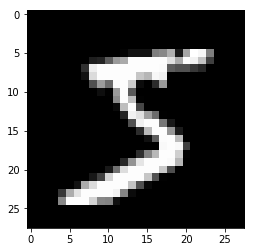

In [34]:
# MNISTのデータの1つ目を可視化する
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("この画像データのラベルは{}です".format(y[0]))


In [0]:

# フォルダ「data」の下にフォルダ「img_78」を作成する
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [0]:

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1


ここまでは準備

In [0]:
#import 
import torch 
import torch.nn as nn 
import torch .optim as optim 
import torch.utils.data as data 
import torchvision 
from torchvision import models, transforms 

import time
import glob 
import os.path as osp 
import random 
import numpy as np 
import json 
from tqdm import tqdm
import matplotlib.pyplot as plt 
%matplotlib inline 
from PIL import Image  

In [0]:
class Generator(nn.Module):
  def __init__(self,z_dim=20,image_size=64):
    super(Generator,self).__init__()

    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(z_dim,image_size * 8, kernel_size=4,stride=1),
        nn.BatchNorm2d(image_size*8),
        nn.ReLU(inplace=True)
    )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 8,image_size*4, kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(image_size*4),
        nn.ReLU(inplace=True)
    )
    self.layer3 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 4,image_size*2, kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(image_size*2),
        nn.ReLU(inplace=True)
    )
    self.layer4 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 2,image_size, kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(image_size),
        nn.ReLU(inplace=True)
    )
    self.last=nn.Sequential(
        nn.ConvTranspose2d(image_size, 1, kernel_size=4,stride=2,padding = 1),
    nn.Tanh()
    )

  def forward(self,z):
    out = self.layer1(z)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.last(out)
    return out 

    

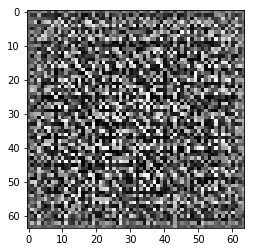

In [39]:
#動作確認
G = Generator(z_dim=20, image_size=64)

#入力する乱数
input_z = torch.randn(1, 20)

#テンソルサイズを(1,20,1,1)に変形
input_z = input_z.view(input_z.size(0),input_z.size(1),1,1)

#偽画像を出力
fake_images = G(input_z)
img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, 'gray')
plt.show()


未学習の状態

**画像生成がどのように行われるのか**
生成器が学習して作った画像をどう評価するのかが問題(人の目で判断していてはキリがない)
-->
識別器を同時に学習させ生成した画像に対して評価する

未熟な生成器Gと未熟な識別器Dを上手く交互に学習をすることで本物のような画像を作ることができる

<h2>識別器D ～Discriminator～ の実装</h2>

In [0]:
class Discriminator(nn.Module):
  def __init__(self, z_dim=20, image_size=64):
    super(Discriminator,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1,image_size,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.1,inplace=True)
        #白黒画像を扱うため入力チャンネルは1つだけ
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(image_size,image_size*2,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.1,inplace=True)
        #白黒画像を扱うため入力チャンネルは1つだけ
    )
    self.layer3 = nn.Sequential(
        nn.Conv2d(image_size*2,image_size*4,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.1,inplace=True)
        #白黒画像を扱うため入力チャンネルは1つだけ
    )
    self.layer4 = nn.Sequential(
        nn.Conv2d(image_size*4,image_size*8,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.1,inplace=True)
        #白黒画像を扱うため入力チャンネルは1つだけ
    )
    self.last = nn.Conv2d(image_size*8,1,kernel_size=4,stride=1)
  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.last(out)
    return out 

    

In [41]:
#動作確認
D = Discriminator(z_dim=20,image_size=64)

#偽画像の生成
input_z = torch.randn(1,20) 
input_z = input_z.view(input_z.size(0),input_z.size(1),1,1)
fake_images = G(input_z)

#偽画像をDに入力
d_out = D(fake_images)

#出力d_outにSigmoidをかける
print(nn.Sigmoid()(d_out))

tensor([[[[0.5044]]]], grad_fn=<SigmoidBackward>)


<h2>DataLoaderの作成をする</h2>

In [0]:
def make_datapath_list():
  train_img_list = list()   #画像ファイルパスを格納

  for img_idx in range(200):
    img_path = './data/img_78/img_7_' + str(img_idx) + '.jpg'
    train_img_list.append(img_path)

    img_path = './data/img_78/img_8_' + str(img_idx) + '.jpg'
    train_img_list.append(img_path)

  return train_img_list

In [0]:
class ImageTransform():
  #画像の前処理クラス

  def __init__(self,mean,std):
    self.data_transform = transforms.Compose([
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean,std)
    ])
  def __call__(self,img):
    return self.data_transform(img)

In [44]:
class GAN_Img_Dataset(data.Dataset):
  #画像のDatasetクラス.PytorchのDatasetクラスを継承
  def __init__(self,file_list,transform):
    self.file_list = file_list
    self.transform = transform
  
  def __len__(self):
    #画像の枚数を返す
    return len(self.file_list)
    
  def __getitem__(self,index):
    #前処理した画像のtensor形式のデータを取得
    img_path = self.file_list[index]
    img = Image.open(img_path)

    #画像の前処理
    img_transformed = self.transform(img)

    return img_transformed 

#DataLoader の動作と確認
#ファイルリストを作成
train_img_list = make_datapath_list()

#Datasetを作成
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list = train_img_list,transform=ImageTransform(mean,std)
)

#DataLoaderを作成
batch_size = 64 
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,batch_size=batch_size,shuffle=True
)

#動作の確認
batch_iterator = iter(train_dataloader)
images = next(batch_iterator)
print(images.size())


torch.Size([64, 1, 64, 64])


<h1>DCGANの学習</h1>

In [45]:
#　ネットワークの初期化
def weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Conv') != -1:
    #Conv2dとConvTranspose2dの初期化
    nn.init.normal_(m.weight.data, 0.0, 0.02)
    nn.init.constant_(m.bias.data, 0)
  elif classname.find('BatchNorm') != -1:
    # BatchNorm2dの初期化
    nn.init.normal_(m.weight.data, 1.0, 0.02)
    nn.init.constant_(m.bias.data, 0)

G.apply(weights_init)
D.apply(weights_init)

print('ネットワークの初期化')



ネットワークの初期化


In [0]:
#モデル関数を学習させる関数を作成

def train_model(G,D,dataloader,num_epochs):

  #GPUが使えるかを確認
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  print('使用デバイス:',device)

  #最適化手法の設定
  g_lr,d_lr =0.0001, 0.0004
  beta1, beta2 = 0.0, 0.9 
  g_optimizer = torch.optim.Adam(G.parameters(), g_lr ,[beta1,beta2])
  d_optimizer = torch.optim.Adam(D.parameters(), d_lr ,[beta1,beta2])

  #誤差関数を定義
  criterion = nn.BCEWithLogitsLoss(reduction = 'mean')

  #パラメータをハードエンコーディング
  z_dim = 20 
  mini_batch_size = 64 

  #ネットワークをGPUへ
  G.to(device)
  D.to(device)

  #モデルを訓練モードに
  G.train()
  D.train() 

  #ネットワークがある程度固定であれば高速化させる
  torch.backends.cudnn.benchmark = True 

  #画像の枚数
  num_train_images = len(dataloader.dataset)
  batch_size = dataloader.batch_size 

  #イテレーションカウンタをリセット
  iteration = 1 
  logs = [] 

  #epochのループ
  for epoch in range(num_epochs): 

    #開始時刻を保存
    t_epoch_start = time.time()
    epoch_g_loss = 0.0 #epochの損失和
    epoch_d_loss = 0.0 #epochの損失和 

    print('-------------')
    print('Epoch {} / {} '.format(epoch, num_epochs))
    print('-------------')
    print('( train )')
    
    #データローダからminibatchずつ取り出すループ
    for imges in dataloader:
      #1. Discriminator の学習
      #ミニバッチが1ならバッチノーマライゼーションでエラ－が出るので避ける
      if imges.size()[0] == 1:
        continue
      #GPUが使えるのならGPUにデータを送る
      imges = imges.to(device)

      #正解ラベルと偽ラベルを作成
      #epoch の最後のイテレーションはミニバッチの数が少なくなる
      mini_batch_size = imges.size()[0]
      label_real = torch.full((mini_batch_size,), 1).to(device)
      label_fake = torch.full((mini_batch_size,), 0).to(device)

      #真の画像を判定
      d_out_real = D(imges)

      #偽の画像を生成して判定
      input_z = torch.randn(mini_batch_size,z_dim).to(device)
      input_z = input_z.view(input_z.size(0), input_z.size(1),1,1)
      fake_images = G(input_z)
      d_out_fake = D(fake_images)

      #誤差を計算
      d_loss_real = criterion(d_out_real.view(-1), label_real)
      d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
      d_loss = d_loss_real + d_loss_fake  

      #バックプロパケーション
      g_optimizer.zero_grad()
      d_optimizer.zero_grad()

      d_loss.backward()
      d_optimizer.step()

      #2. Generatorの学習

      #偽の画像を生成して判定
      input_z = torch.randn(mini_batch_size, z_dim).to(device)
      input_z = input_z.view(input_z.size(0), input_z.size(1),1 ,1)
      fake_images = G(input_z)
      d_out_fake = D(fake_images)

      #誤差を計算
      g_loss = criterion(d_out_fake.view(-1), label_real)

      #バックプロパケーション
      g_optimizer.zero_grad()
      d_optimizer.zero_grad()

      g_loss.backward()
      g_optimizer.step()

      #記録
      epoch_d_loss += d_loss.item()
      epoch_g_loss += g_loss.item()
      iteration += 1
    
    #epochのphaseごとのlossと正解率
    t_epoch_finish = time.time()
    print('-------------')
    print('epoch {} || Epoch_D_Loss:{:.4f} ||Epoch_G_Loss:{:.4f}'.format(epoch, epoch_d_loss/batch_size, epoch_g_loss/batch_size))
    print('timer: {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
    t_epoch_start = time.time()

  return G,D

In [49]:
#学習と検証
num_epochs =200
G_update, D_update = train_model(G,D,dataloader=train_dataloader,num_epochs=num_epochs)

使用デバイス: cuda:0
-------------
Epoch 0 / 200 
-------------
( train )
-------------
epoch 0 || Epoch_D_Loss:0.0693 ||Epoch_G_Loss:0.2377
timer: 2.0398 sec.
-------------
Epoch 1 / 200 
-------------
( train )
-------------
epoch 1 || Epoch_D_Loss:0.0118 ||Epoch_G_Loss:0.5239
timer: 1.4619 sec.
-------------
Epoch 2 / 200 
-------------
( train )
-------------
epoch 2 || Epoch_D_Loss:0.0009 ||Epoch_G_Loss:0.6399
timer: 1.4330 sec.
-------------
Epoch 3 / 200 
-------------
( train )
-------------
epoch 3 || Epoch_D_Loss:0.0603 ||Epoch_G_Loss:0.5222
timer: 1.4510 sec.
-------------
Epoch 4 / 200 
-------------
( train )
-------------
epoch 4 || Epoch_D_Loss:0.0006 ||Epoch_G_Loss:0.6937
timer: 1.4507 sec.
-------------
Epoch 5 / 200 
-------------
( train )
-------------
epoch 5 || Epoch_D_Loss:0.0876 ||Epoch_G_Loss:0.2868
timer: 1.4660 sec.
-------------
Epoch 6 / 200 
-------------
( train )
-------------
epoch 6 || Epoch_D_Loss:0.1125 ||Epoch_G_Loss:0.1293
timer: 1.4545 sec.
------------

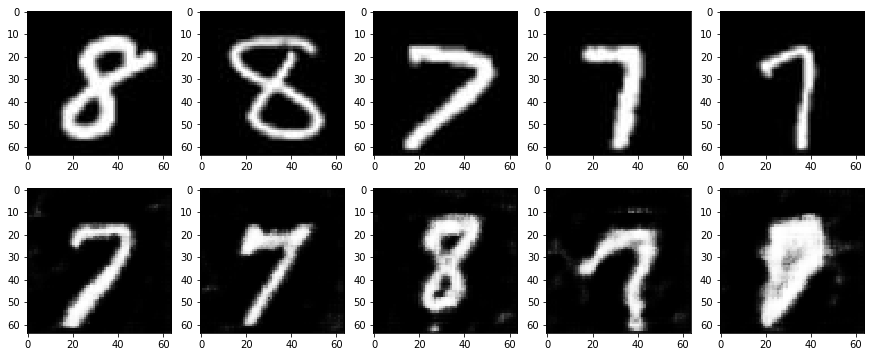

In [52]:
#学習結果の可視化

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#入力の乱数生成
batch_size = 8 
z_dim = 20 
fixed_z = torch.randn(batch_size, z_dim)
fixed_z = fixed_z.view(fixed_z.size(0), fixed_z.size(1),1 ,1)

#画生成
fake_images = G_update(fixed_z.to(device))

#訓練データ
batch_iterator = iter(train_dataloader)  #イテレータに変換
imges = next(batch_iterator)  #1番目の要素を取り出す

#出力
fig = plt.figure(figsize = (15,6))
for i in range(0,5):
  #上段に訓練データを表示
  plt.subplot(2,5,i+1)
  plt.imshow(imges[i][0].cpu().detach().numpy(),'gray')

  #下段
  plt.subplot(2,5,5+i+1)
  plt.imshow(fake_images[i][0].cpu().detach().numpy(),'gray')
